# 🎮 Experiment 1: Data Preprocessing on Video Game Sales Dataset

Date: *08/01/2026*


---




## Aim
To perform data preprocessing on the Video Game Sales dataset by handling missing values, analyzing data types, and visualizing distributions.





## Theory
Data preprocessing is an important step in machine learning. It includes:

- Handling missing values  
- Checking data types  
- Feature selection  
- Data visualization  
- Cleaning and transforming data  

Proper preprocessing improves model performance.







## Import Libraries


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


## Uploading Dataset


In [ ]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv('vgsales.csv')


Saving vgsales.csv to vgsales.csv


## Display Dataset


In [ ]:
df.head()


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


## Dataset Shape


In [ ]:
df.shape


(16598, 11)

## Dataset Information


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


## Grouping and Aggregation


In [ ]:
# Example: Average global sales by platform
grouped = df.groupby('Platform')['Global_Sales'].mean()
grouped


,Global_Sales
Platform,
2600,0.746293
3DO,0.033333
3DS,0.493527
DC,0.307115
DS,0.384284
GB,2.622887
GBA,0.388830
GC,0.363727
GEN,1.050370


## Data Types


In [ ]:
df.dtypes


,0
Rank,int64
Name,object
Platform,object
Year,float64
Genre,object
Publisher,object
NA_Sales,float64
EU_Sales,float64
JP_Sales,float64
Other_Sales,float64


## Checking Missing Values


In [ ]:
df.isnull().sum()


,0
Rank,0
Name,0
Platform,0
Year,271
Genre,0
Publisher,58
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


## Handling Missing Values


In [ ]:
df = df.dropna()


## Handling Missing Values using Imputer


In [ ]:
from sklearn.impute import SimpleImputer


In [ ]:
num_cols = df.select_dtypes(include=np.number)

imputer = SimpleImputer(strategy='mean')

df[num_cols.columns] = imputer.fit_transform(num_cols)


Missing numeric values are replaced using the mean of each column.


In [ ]:
df.isnull().sum()


,0
Rank,0
Name,0
Platform,0
Year,0
Genre,0
Publisher,0
NA_Sales,0
EU_Sales,0
JP_Sales,0
Other_Sales,0


## Statistical Summary


In [ ]:
df.describe()


,Rank,Year,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
count,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000,16291.000000
mean,8290.190228,2006.405561,0.265647,0.147731,0.078833,0.048426,0.540910
std,4792.654450,5.832412,0.822432,0.509303,0.311879,0.190083,1.567345
min,1.000000,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000
25%,4132.500000,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000
50%,8292.000000,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000
75%,12439.500000,2010.000000,0.240000,0.110000,0.040000,0.040000,0.480000
max,16600.000000,2020.000000,41.490000,29.020000,10.220000,10.570000,82.740000


## Data Visualization - Histogram


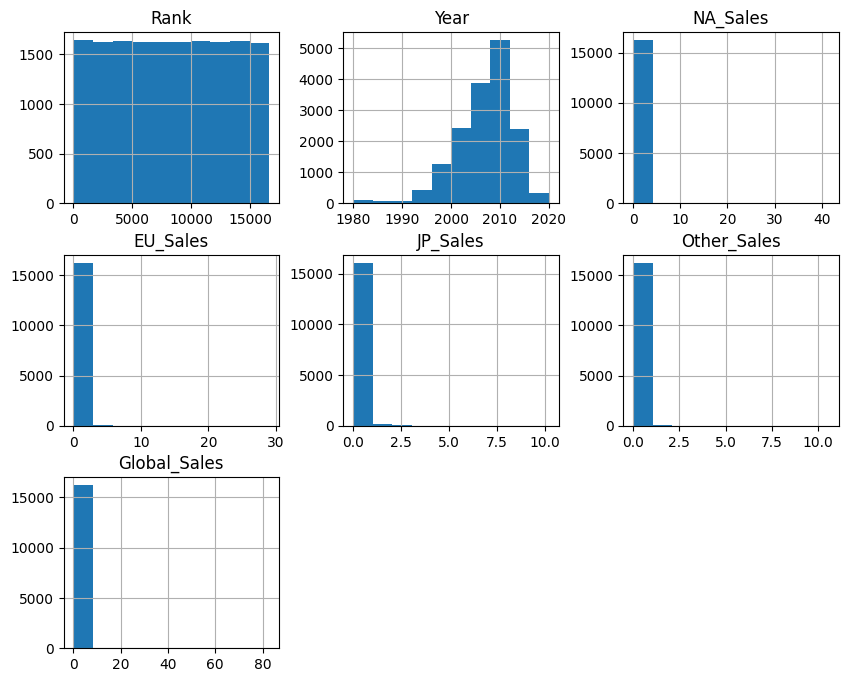

In [ ]:
df.hist(figsize=(10,8))
plt.show()


## Density Plot


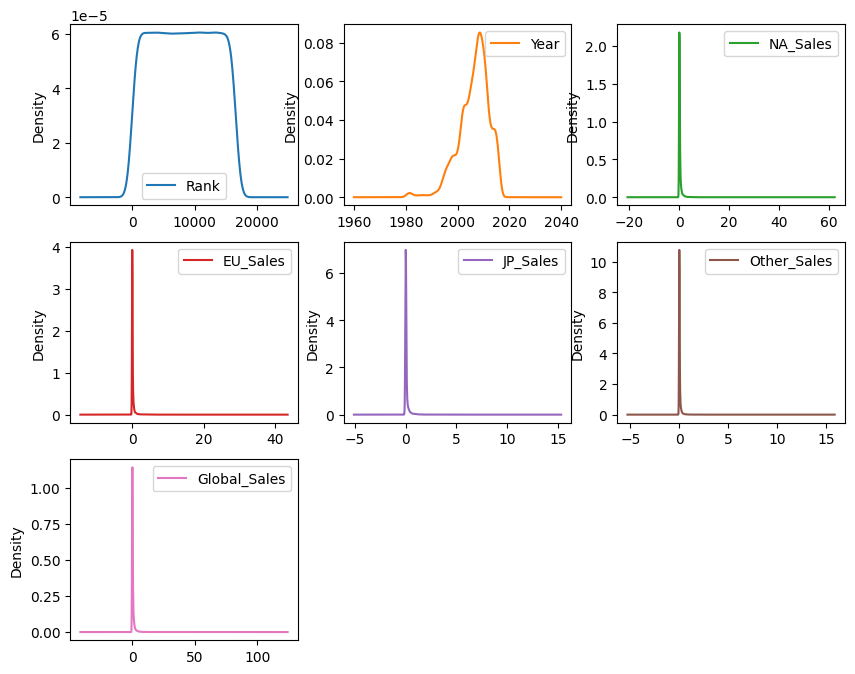

In [ ]:
df.plot(kind='density', subplots=True, layout=(3,3), sharex=False, figsize=(10,8))
plt.show()


## Feature Selection


In [ ]:
X = df.select_dtypes(include=[np.number]).iloc[:,:-1]
y = df.select_dtypes(include=[np.number]).iloc[:,-1]

X
y


,Global_Sales
0,82.74
1,40.24
2,35.82
3,33.00
4,31.37
...,...
16593,0.01
16594,0.01
16595,0.01
16596,0.01


## Result
The dataset was successfully preprocessed. Missing values were handled and data distributions were visualized.


## Conclusion
Data preprocessing helps in cleaning and understanding the dataset before applying machine learning models.
